In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('PowerPlant.csv')

In [3]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [4]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
x=df.drop(labels='PE',axis=1)
y=df[['PE']]

In [7]:
x

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20
...,...,...,...,...
9563,15.12,48.92,1011.80,72.93
9564,33.41,77.95,1010.30,59.72
9565,15.99,43.34,1014.20,78.66
9566,17.65,59.87,1018.58,94.65


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss= StandardScaler()

In [11]:
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [13]:
x

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427
...,...,...,...,...
9563,-0.608049,-0.423838,-0.245699,-0.025958
9564,1.846298,1.860689,-0.498289,-0.930783
9565,-0.491303,-0.862958,0.158445,0.366521
9566,-0.268547,0.437876,0.896008,1.461763


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [19]:
from keras.models import Sequential
from keras.layers import Input,Dense

In [21]:
## initialize the model
model=Sequential()

## add input layers
model.add(Input(shape=(xtrain.shape[1])))

## add hidden layer 1
model.add(Dense(units=64,activation='relu'))

##add hidden layer 2
model.add(Dense(units=32,activation='relu'))

## add output layer
model.add(Dense(units=1,activation='linear'))

In [22]:
model.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [23]:
hist=model.fit(xtrain,ytrain,validation_split=0.2,epochs=50)

Epoch 1/50
192/192 [==============================] - 2s 4ms/step - loss: 188672.0625 - mae: 433.3706 - val_loss: 141941.7031 - val_mae: 375.3990
Epoch 2/50
192/192 [==============================] - 1s 4ms/step - loss: 63564.9297 - mae: 226.5036 - val_loss: 21074.0410 - val_mae: 122.1538
Epoch 3/50
192/192 [==============================] - 1s 4ms/step - loss: 14842.2939 - mae: 102.6954 - val_loss: 10799.8018 - val_mae: 87.8811
Epoch 4/50
192/192 [==============================] - 1s 4ms/step - loss: 7188.5298 - mae: 71.2160 - val_loss: 4652.9014 - val_mae: 57.5669
Epoch 5/50
192/192 [==============================] - 1s 4ms/step - loss: 2999.0305 - mae: 45.0525 - val_loss: 1901.9803 - val_mae: 35.9476
Epoch 6/50
192/192 [==============================] - 1s 3ms/step - loss: 1319.3060 - mae: 29.0615 - val_loss: 911.0444 - val_mae: 24.2972
Epoch 7/50
192/192 [==============================] - 1s 3ms/step - loss: 696.7387 - mae: 20.6597 - val_loss: 517.4956 - val_mae: 18.2031
Epoch 8/50

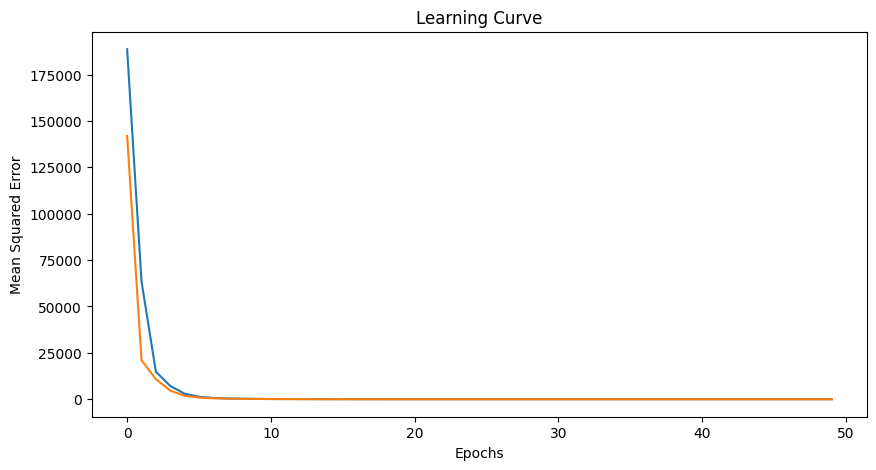

In [28]:
## plot the learning curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.show()

In [29]:
# Evaluate model

model.evaluate(xtrain,ytrain)

240/240 [==============================] - 1s 3ms/step - loss: 18.5145 - mae: 3.3606


[18.514530181884766, 3.36063551902771]

In [30]:
model.evaluate(xtest,ytest)

60/60 [==============================] - 1s 7ms/step - loss: 18.6486 - mae: 3.4417


[18.648591995239258, 3.441697359085083]

In [31]:
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

60/60 [==============================] - 0s 2ms/step


In [32]:
ytrain.head()

,PE
72,448.69
8058,482.19
5734,436.44
4721,432.81
810,446.62


In [33]:
ytrain.head()
tr_pred[:5]

array([[446.7087 ],
       [480.0991 ],
       [439.3654 ],
       [432.68704],
       [444.2338 ]], dtype=float32)

In [35]:
ytrain.head()
tr_pred[:6]

array([[446.7087 ],
       [480.0991 ],
       [439.3654 ],
       [432.68704],
       [444.2338 ],
       [434.79318]], dtype=float32)

In [36]:
from sklearn.metrics import mean_absolute_error,r2_score

In [37]:
tr_score=r2_score(tr_pred,ytrain)
print(tr_score)

0.9303897514823807


In [38]:
ts_score=r2_score(ts_pred,ytest)
print(ts_score)

0.927731684706442
